In [1]:
%%bash
pip install seaborn --user

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn


from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validateBCdata = pd.read_csv("dataR2.csv", delimiter=",")
BCdata.head()
from sklearn.model_selection import StratifiedKFold

In [10]:
Heartdata = pd.read_csv("processed.cleveland.data.txt", delimiter=",", header = None)
Heartdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
XData = Heartdata
XData.dtypes
col = XData.select_dtypes("number").columns
col
XData[col]

,0,1,2,3,4,5,6,7,8,9,10,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,1


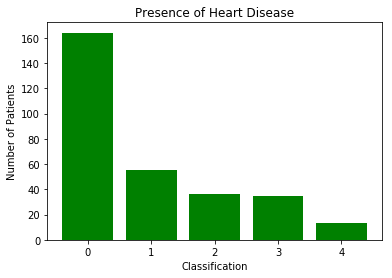

<Figure size 432x288 with 0 Axes>

In [14]:
plt.bar(Heartdata[13].value_counts().keys(), Heartdata[13].value_counts(), color = "g", )
plt.xlabel('Classification')
plt.ylabel('Number of Patients')
plt.title('Presence of Heart Disease')
plt.show()
plt.savefig('HeartDisease.png', dpi=300)